In [2]:
import pandas as pd
import tqdm
import networkx as nx
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import math
import simplekml as skml
import itertools 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [3]:
data = pd.read_feather(os.getcwd() + '/metadata.feather', columns=['filename','medianame','datetime','lat','lon'])
data

,filename,medianame,datetime,lat,lon
0,meta-27PknKIOwHt6.json,27PknKIOwHt6.mov,2020-10-31 23:02:29,34.0724,-118.4026
1,meta-m3Wq53jjPnpw.json,m3Wq53jjPnpw.mov,2020-12-21 23:22:36,34.0473,-118.2599
2,meta-kpKT3stt5LXq.json,kpKT3stt5LXq.mov,2020-12-04 20:49:20,26.3340,-80.2949
3,meta-qgU5924Q8jQh.json,qgU5924Q8jQh.mov,2020-11-04 07:29:46,33.9827,-118.2094
4,meta-XfeRIAoVLtei.json,XfeRIAoVLtei.mov,2020-07-02 12:50:02,-22.3546,-42.3357
...,...,...,...,...,...
68281,meta-JMfLmefCzvMW.json,JMfLmefCzvMW.mov,2020-06-30 07:03:29,-35.2165,138.5386
68282,meta-33oluYHSIrDn.json,33oluYHSIrDn.mov,2020-07-17 09:44:45,33.8139,-117.5453
68283,meta-pMdvwJuktYPj.json,pMdvwJuktYPj.mov,2020-12-12 19:53:48,38.8907,-77.0058
68284,meta-50A0Fl2Fcg89.json,50A0Fl2Fcg89.mov,2020-11-25 21:05:29,49.1741,-122.6799


In [4]:
# Filter to data from 6 Jan 2021 1300 - 2000
dday = data[(data.datetime > dt.datetime(2021,1,6,13,0,0)) & (data.datetime < dt.datetime(2021,1,6,20,0,0))]
dday

,filename,medianame,datetime,lat,lon
34,meta-8YA6CeYMxHh4.json,8YA6CeYMxHh4.mov,2021-01-06 17:07:48,38.8922,-77.0352
72,meta-91Vga2rHrrID.json,91Vga2rHrrID.mov,2021-01-06 13:03:23,38.8919,-77.0368
123,meta-a3NbAuIyNM3v.json,a3NbAuIyNM3v.mp4,2021-01-06 16:52:51,0.0000,0.0000
199,meta-c5ovRK1TspWu.json,c5ovRK1TspWu.mov,2021-01-06 13:24:08,39.6470,-75.7552
219,meta-Y5dbxuH1GAHY.json,Y5dbxuH1GAHY.mp4,2021-01-06 18:23:49,0.0000,0.0000
...,...,...,...,...,...
68013,meta-BNv7l898hTO5.json,BNv7l898hTO5.mov,2021-01-06 16:23:23,34.2646,-77.8150
68041,meta-phhv8fyASH1F.json,phhv8fyASH1F.mov,2021-01-06 17:12:13,41.7640,-72.6856
68093,meta-Ql2J5GJRtJVh.json,Ql2J5GJRtJVh.mp4,2021-01-06 15:00:26,38.8920,-77.0353
68099,meta-pmIbT1fHBBTK.json,pmIbT1fHBBTK.mov,2021-01-06 17:27:04,36.7512,-96.9243


In [5]:
# Drill down to the Capitol Building and grounds
pplace = dday[(data.lat < 38.8932) & (data.lon < -77.0038) & (data.lat > 38.8864) & (data.lon > -77.0134)]
pplace

,filename,medianame,datetime,lat,lon
457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114
718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098
765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085
767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103
817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132
...,...,...,...,...,...
67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122
67123,meta-XVwLXkaqrq94.json,XVwLXkaqrq94.mov,2021-01-06 19:52:02,38.8899,-77.0104
67235,meta-7fckI1220tbu.json,7fckI1220tbu.mov,2021-01-06 18:19:23,38.8900,-77.0103
67748,meta-tb76lsT2Wakl.json,tb76lsT2Wakl.mp4,2021-01-06 18:01:54,38.8898,-77.0102


In [6]:
#To use the timestamps, we'll need to convert them to a scalable value, so we convert them to total seconds since the range start point.
base_time = dt.datetime(2021,1,6,13,0,0)
seconds = pplace.datetime.map(lambda x: (x - base_time).total_seconds())
pplace['seconds'] = seconds

#Clear out any videos created at the same second in the same 32ft space as probable duplicates.
clean_points = pplace.drop_duplicates(subset=['datetime', 'lat', 'lon']).reset_index()
clean_points

,index,filename,medianame,datetime,lat,lon,seconds
0,457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114,22420.0
1,718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098,24833.0
2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0
3,767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103,24091.0
4,817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132,17717.0
...,...,...,...,...,...,...,...
246,66564,meta-sT75WFu2QPLW.json,sT75WFu2QPLW.mov,2021-01-06 18:02:10,38.8905,-77.0117,18130.0
247,66796,meta-GDnybzI29aCx.json,GDnybzI29aCx.mov,2021-01-06 19:09:50,38.8905,-77.0109,22190.0
248,67037,meta-MOPeiWMzp6mh.json,MOPeiWMzp6mh.mov,2021-01-06 19:25:36,38.8903,-77.0113,23136.0
249,67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122,23882.0


In [16]:
# Reduce the df to just the 3 features we're going to process.
points = clean_points[['seconds', 'lat', 'lon']]

# Normalize the features.
scaling = StandardScaler()
points_scaled = scaling.fit_transform(points)
points_normalized = normalize(points_scaled)
points_normalized = pd.DataFrame(points_normalized)

# As it stands, we're assuming 1% of the E-W distance is as significant as 1% of the N-S distance, which is as significant as 1% of the 7-hour period examined. 
# Since that's clearly not true, we need to scale the normalized values on significance.  E-W and N-S should be scaled to the same significance on distance.
# Time is trickier.  In general, we are considering an indication of a "significant event" to be something several people recorded in roughly 50ftx50ft area, over ~5 min of time.

lat_degree_ft = 362450
lon_degree_ft = 286400

lat_chunks = (clean_points.lat.max() - clean_points.lat.min()) * lat_degree_ft / 50
lon_chunks = (clean_points.lon.max() - clean_points.lon.min()) * lat_degree_ft / 50
time_chunks = (clean_points.seconds.max() - clean_points.seconds.min()) / 300
max_chunks = max(lat_chunks, lon_chunks, time_chunks)
lat_scalar = lat_chunks / max_chunks
lon_scalar = lon_chunks / max_chunks
time_scalar = time_chunks / max_chunks

points_normalized[0] = points_normalized[0].map(lambda x: x * time_scalar)
points_normalized[1] = points_normalized[1].map(lambda x: x * lat_scalar)
points_normalized[2] = points_normalized[2].map(lambda x: x * lon_scalar)

points_normalized

,0,1,2
0,0.004007,0.572450,-0.355641
1,0.628448,-0.392666,0.300679
2,0.335992,-0.244371,0.835645
3,0.797478,0.258482,0.137941
4,-0.565700,0.315677,-0.574777
...,...,...,...
246,-0.788143,0.148687,-0.396079
247,-0.137959,0.525161,-0.490742
248,0.423535,0.166812,-0.836282
249,0.415832,0.153811,-0.847727


In [17]:
#Conduct Principal Components Analysis to render meaningful 2-dimensional data.
pca = PCA(n_components=2)
points_pca = pca.fit_transform(points_normalized)
points_pca = pd.DataFrame(points_pca)
points_pca.columns = ['p1', 'p2']
points_pca

,p1,p2
0,0.271573,-0.366102
1,-0.703261,-0.013757
2,-0.735637,0.559564
3,-0.689641,-0.349555
4,0.839347,-0.186534
...,...,...
246,0.910536,0.110407
247,0.458532,-0.389837
248,0.142506,-0.922117
249,0.153832,-0.925007


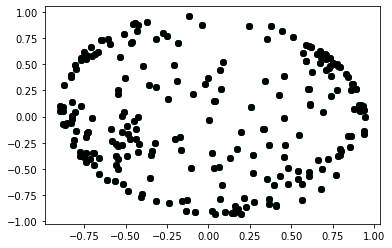

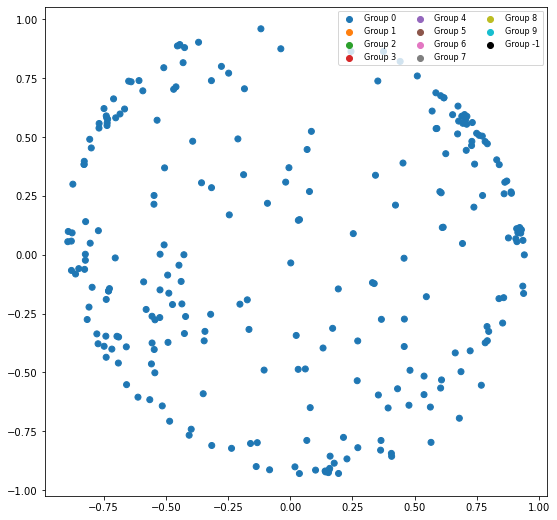

In [18]:
#Starting point for our clustering, using default values.

cluster_model = DBSCAN(eps = 0.5, min_samples = 5).fit(points_pca)
labels = cluster_model.labels_

colors1 = ['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k' ] 

colors = {} 
indices = [0,1,2,3,4,5,6,7,8,9,-1]
for i in indices:
    colors[i] = colors1[i]  

cvec = [colors[label] for label in labels] 
scatter_colors = [(plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[x])) for x in indices]  
scatter_groups = ['Group ' + str(x) for x in indices]
  
plt.figure(figsize =(9, 9)) 
plt.scatter(points_pca['p1'], points_pca['p2'], c = cvec)
plt.legend(
            scatter_colors,
            scatter_groups,
            scatterpoints = 1, 
            loc ='upper right', 
            ncol = 3, 
            fontsize = 8) 
plt.show() 

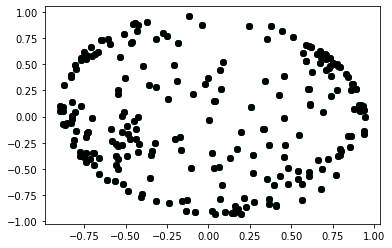

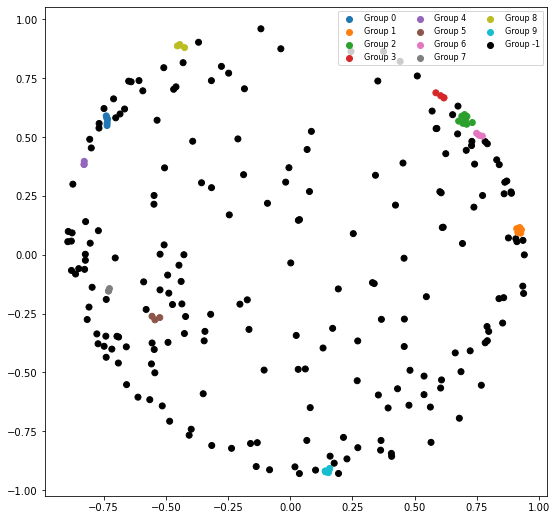

In [35]:
#Adjust epsilon and samples to be representative of what we want.

cluster = DBSCAN(eps=0.0249675, min_samples=3).fit(points_pca)
labels_new = cluster.labels_ 

colors = ['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'k' ] 

colors1 = {} 
indices = [0,1,2,3,4,5,6,7,8,9,-1]
for i in indices:
    colors1[i] = colors[i]
  
cvec = [colors1[label] for label in labels_new] 
scatter_colors = [(plt.scatter(points_pca['p1'], points_pca['p2'], marker ='o', color = colors[x])) for x in indices]  
scatter_groups = ['Group ' + str(x) for x in indices]

plt.figure(figsize =(9, 9)) 
plt.scatter(points_pca['p1'], points_pca['p2'], c = cvec)
plt.legend(
            scatter_colors,
            scatter_groups,
            scatterpoints = 1, 
            loc ='upper right', 
            ncol = 3, 
            fontsize = 8)
            
plt.show() 

In [36]:
#Add Cluster IDs to the clean points frame
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[cluster.core_sample_indices_] = True
labels = pd.DataFrame(cluster.labels_,columns=['Cluster ID'])
clean_points['Cluster ID'] = labels
clean_points

,index,filename,medianame,datetime,lat,lon,seconds,Cluster ID
0,457,meta-kVSC3Z1yeZEe.json,kVSC3Z1yeZEe.mov,2021-01-06 19:13:40,38.8912,-77.0114,22420.0,-1
1,718,meta-QsKjvIGPfWKU.json,QsKjvIGPfWKU.mp4,2021-01-06 19:53:53,38.8896,-77.0098,24833.0,-1
2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0,0
3,767,meta-X9301RyNxl2u.json,X9301RyNxl2u.mov,2021-01-06 19:41:31,38.8904,-77.0103,24091.0,-1
4,817,meta-b0s87hxTGufb.json,b0s87hxTGufb.mov,2021-01-06 17:55:17,38.8912,-77.0132,17717.0,-1
...,...,...,...,...,...,...,...,...
246,66564,meta-sT75WFu2QPLW.json,sT75WFu2QPLW.mov,2021-01-06 18:02:10,38.8905,-77.0117,18130.0,1
247,66796,meta-GDnybzI29aCx.json,GDnybzI29aCx.mov,2021-01-06 19:09:50,38.8905,-77.0109,22190.0,-1
248,67037,meta-MOPeiWMzp6mh.json,MOPeiWMzp6mh.mov,2021-01-06 19:25:36,38.8903,-77.0113,23136.0,9
249,67111,meta-sxHzcBEewg7i.json,sxHzcBEewg7i.mov,2021-01-06 19:38:02,38.8904,-77.0122,23882.0,9


In [37]:
#Reduce down to records that were clustered
clusters = clean_points.dropna()
clusters = clusters[clusters['Cluster ID'] >= 0]
clusters.sort_values(by=['Cluster ID'])


,index,filename,medianame,datetime,lat,lon,seconds,Cluster ID
2,765,meta-5kf2savkefB7.json,5kf2savkefB7.mov,2021-01-06 19:36:20,38.8898,-77.0085,23780.0,0
11,1472,meta-XZeZIBxC6R64.json,XZeZIBxC6R64.mov,2021-01-06 19:35:55,38.8898,-77.0086,23755.0,0
65,11727,meta-8fsC1EfPO70k.json,8fsC1EfPO70k.mov,2021-01-06 19:38:18,38.8898,-77.0082,23898.0,0
20,2898,meta-tXIzFNM5yp9f.json,tXIzFNM5yp9f.mov,2021-01-06 19:39:52,38.8898,-77.0080,23992.0,0
203,54230,meta-4wIDySD7tKxo.json,4wIDySD7tKxo.mov,2021-01-06 19:30:48,38.8899,-77.0089,23448.0,0
7,896,meta-FX86zIGkN6wH.json,FX86zIGkN6wH.mov,2021-01-06 18:31:51,38.8903,-77.0112,19911.0,1
246,66564,meta-sT75WFu2QPLW.json,sT75WFu2QPLW.mov,2021-01-06 18:02:10,38.8905,-77.0117,18130.0,1
58,9882,meta-zBLIrh4Yl7XH.json,zBLIrh4Yl7XH.mov,2021-01-06 18:00:11,38.8905,-77.0118,18011.0,1
121,27636,meta-Dr91Sy9JPaqz.json,Dr91Sy9JPaqz.mp4,2021-01-06 17:57:16,38.8904,-77.0119,17836.0,1
184,47046,meta-kLb23eMMSAyI.json,kLb23eMMSAyI.mov,2021-01-06 19:00:55,38.8902,-77.0107,21655.0,1


In [45]:
boxes = []


for i in range(10):
    clust = clusters[clusters['Cluster ID'] == i]
    start = clust['datetime'].min()
    end = clust['datetime'].max()
    time_dist = ((end - start).total_seconds() / 60)
    x_range = (clust['lon'].max() + 0.00005, clust['lon'].min() - 0.00005)
    y_range = (clust['lat'].max() + 0.00005, clust['lat'].min() - 0.00005)
    area_x = (x_range[0] - x_range[1]) * lon_degree_ft
    area_y = (x_range[0] - x_range[1]) * lat_degree_ft
    print(f'Cluster {i} count: {len(clust)} | duration: {(time_dist):.2f} min | area: {area_x:.2f}ft x {area_y:.2f}ft')
    boxes.append({'cluster': i, 'start': start, 'end': end, 'time_dist': time_dist, 'x_range': x_range, 'y_range': y_range})


Cluster 0 count: 5 | duration: 9.07 min | area: 286.40ft x 362.45ft
Cluster 1 count: 5 | duration: 63.65 min | area: 372.32ft x 471.19ft
Cluster 2 count: 8 | duration: 56.12 min | area: 57.28ft x 72.49ft
Cluster 3 count: 4 | duration: 3.68 min | area: 28.64ft x 36.25ft
Cluster 4 count: 3 | duration: 38.17 min | area: 572.80ft x 724.90ft
Cluster 5 count: 3 | duration: 16.62 min | area: 143.20ft x 181.23ft
Cluster 6 count: 3 | duration: 29.55 min | area: 28.64ft x 36.25ft
Cluster 7 count: 3 | duration: 1.32 min | area: 28.64ft x 36.25ft
Cluster 8 count: 4 | duration: 2.10 min | area: 343.68ft x 434.94ft
Cluster 9 count: 5 | duration: 20.65 min | area: 458.24ft x 579.92ft


In [39]:
kml = skml.Kml()
kml.document.name = 'clusters_dbscan'
poly_colors = [skml.Color.blue,skml.Color.orange, skml.Color.green, skml.Color.red, skml.Color.purple, skml.Color.brown, skml.Color.pink, skml.Color.gray, skml.Color.olive, skml.Color.cyan]
for box in boxes:
    pol = kml.newpolygon(name = 'Cluster' + str(box['cluster']))
    a = [list(zip(x, box['x_range'])) for x in itertools.permutations(box['y_range'], len(box['x_range']))]
    a = a[0] + a[1]
    a.insert(0, a.pop())
    a.insert(2, a.pop())
    a.insert(0, a[-1])
    pol.outerboundaryis = a
    pol.polystyle.Color = str(poly_colors[box['cluster']]) + 'ff'
    pol.linestyle.width = 3
    pol.polystyle.fill = 0
    pol.polystyle.outline = 1


kml.save('clusters_dbscan_t.kml')
    
